#### 결정 트리 (Decision Tree)
- 매우 쉽고 유연하게 적용될 수 있는 알고리즘으로서 데이터의 스케일링, 정규화 등의 데이터 전처리의 의존도가 매우 적다.
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내서 Tree 기반의 분류 규칙을 만든다.
- 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정트리에서는 정규화나 표준화 같은 전처리 과정이 필요없다.
- 영향을 가장 많이 미치는 feature를 찾아낼 수도 있다.
- 예측 성능을 계속해서 향상시키면 복잡한 규칙 구조를 가지기 때문에 <sub>※</sub>과적합(Overfitting)이 발생해서 예측 성능이 저하될 수도 있다.
- 가장 상위 노드를 "루트 노드"라고 하며, 나머지 분기점을 "서브  노드", 결정된 분류값 노드를 "리프 노드"라고 한다.

<img src="./images/decision_tree.png"  width="550" style="margin: 20px 0 20px 20px">

- 복잡도를 감소시키는 것이 주목적이며, 정보의 복잡도를 불순도(Impurity)라고 한다.
- 이를 수치화한 값으로 지니 계수(Gini coeficient)가 있다.
- 클래스가 섞이지 않고 분류가 잘 되었다면, 분순도가 낮다.
- 클래스가 많이 섞여 있고 분류가 잘 안 되었다면, 분순도가 높다.
- 통계적 분산 정도를 정량화하여 표현한 값이고, 0과 1사이의 값을 가진다. (0의 값을 가질 수록 과적합(Overfitting))
- 지니 계수가 낮을 수록 분류가 잘 된 것이다.

---

<sub>※ 과적합이란, 학습 데이터를 과하게 학습시켜서 실제 데이터에서는 오차가 오히려 증가하는 현상이다.</sub>

<img src="./images/overfitting.png" width="350" style="margin-left: -10px">
- 맨 처음에는 과소적합.. 에러가 많이남

#### Graphviz
- 결정트리 모델을 시각화할 수 있다.
- https://graphviz.org/download/  
  graphviz-9.0.0 (64-bit) EXE installer [sha256]
- https://drive.google.com/file/d/1oCXidIjNAvUT2UcNFEdhRfFhnZ96iHrp/view?usp=sharing

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Decision Tree분류 모델 dtc에 담기
dtc = DecisionTreeClassifier()
# 아이리스(iris) 예시 데이터 호출 후 iris에 담기
iris = load_iris()

# 학습, 테스트 데이터로 분리
X_train, X_test, y_train, y_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=124)

# 문제 데이터와 정답 데이터를 가지고 학습하기(데이터 간의 패턴 분석)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [2]:
from sklearn.tree import export_graphviz

# Decision Tree 모델 시각화하기 위한 Graphviz dot 포맷으로 변환
# 시각화 모델 지정, 출력 파일 경로 및 이름 지정, 타겟 클래스 이름 설정, 특성 이름 설정, 노드 불순도 표시 여부, 노드 색을 불순도에 따라 채울지 여부
export_graphviz(
    dtc,
    out_file='./images/iris_dtc01.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True,
    filled=True
)

In [3]:
import graphviz

# with문으로 파일을 열거나 또는 다른 리소스 사용(사용 후 닫음)
# 해당 경로에 있는 dot파일을 열고 f에 담기
with open('./images/iris_dtc01.dot') as f:
    # f에 담겨 열린 파일의 내용을 read로 읽고 iris_dtc01에 담기
    iris_dtc01 = f.read()

# iris_dtc01 파일의 내용을 그래프 객체로 변환
iris_dtc01_graph = graphviz.Source(iris_dtc01)

In [4]:
# 그래프 객체 이미지 파일로 랜더링
# 저장될 파일 이름, 경로, 포맷 지정
iris_dtc01_graph.render(filename="iris_dtc01", directory="./images", format="png")

'images\\iris_dtc01.png'

<img src="./images/iris_dtc01.png">

#### Feature 별 중요도
**각 feature가 분류를 나누는 데에 얼마나 큰 영향을 미쳤는지를 표기하는 척도이다.**
- feature_importances_
- 분류를 결정하는 데에 얼만큼 기여했는 지를 feature 별로 수치를 리턴해 준다.

In [5]:
# 피처 이름 출력
print(iris.feature_names)
# 피처 별 기여도 출력
print(dtc.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.57588361 0.42411639]


In [6]:
# zip함수로 두개의 리스트를 묶기
# name(피처 명)과 value(중요도)에 하나씩 값을 반복하여 담기
for name, value in zip(iris.feature_names, dtc.feature_importances_):
    # 피처명의 중요도를 백분율로 표현하여 출력
    print(f'{name}: {round(value * 100, 2)}%')

sepal length (cm): 0.0%
sepal width (cm): 0.0%
petal length (cm): 57.59%
petal width (cm): 42.41%


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

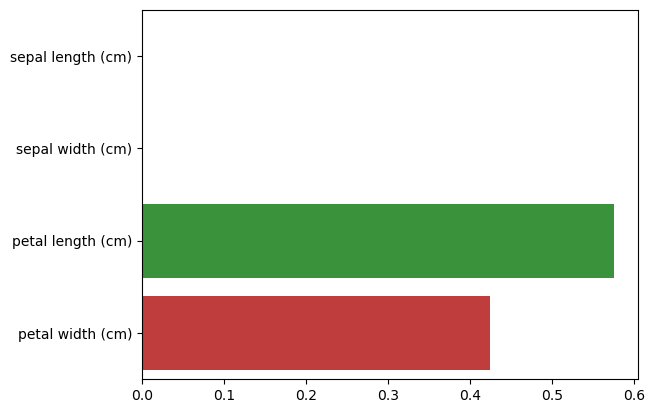

In [8]:
# 각 피처 별 중요도를 바 그래프로 표현하기
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)

#### 결정 트리의 과적합
- 위에서 알아낸 것처럼 petal length, petal width, 2개의 feature만으로도 분류가 가능하기 때문에, 2차원 산점도를 통해 시각화할 수 있다.
- 마지막까지 노드가 분리되었기 때문에 과적합이 발생했을 가능성이 있고, 이를 <sub>※</sub>하이퍼 파라미터 튜닝을 통해 해결할 수 있다.

<sub>※ 하이퍼 파라미터란 최적의 훈련 모델을 구현하기 위해 알고리즘의 수치를 조정할 수 있는 변수를 의미한다.</sub>

In [9]:
# iris 데이터 세트의 타겟 확인
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

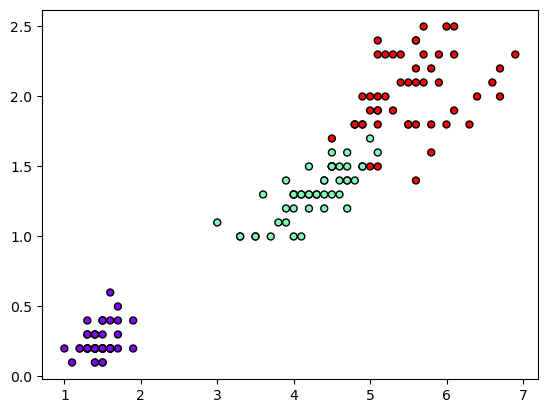

In [10]:
# iris 데이터 세트의 피처와 타겟 분리
features, targets =  iris.data, iris.target

# 산점도 그래프 그리기
# x=전체 피처 중 3번째, y=전체 피처 중 4번째, c=타겟값에 따라 색 다르게 주기, edgecolors=점의 테두리 검은색, cmap=색상 맵 무지개, s=점의 크기, marker=점 모양
plt.scatter(features[:, 2], features[:, 3], c=targets, edgecolors='k', cmap="rainbow", s=25, marker='o')
# 그래프 표시
plt.show()

In [11]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

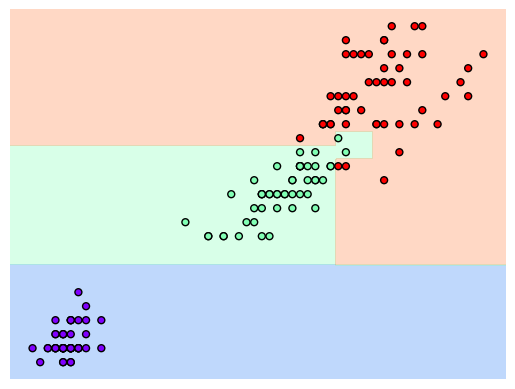

In [16]:
# iris 데이터 세트의 피처와 타겟 분리
# 전체 행의 3번째, 4번째 데이터를 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features, targets = iris.data[:, [2, 3]], iris.target

# 결정 트리의 무작위성을 제어하고 분류 모델 담기
dtc = DecisionTreeClassifier(random_state=124)
# 데이터 학습
dtc.fit(features, targets)
# 시각화 함수를 통해 데이터 시각화
visualize_boundary(dtc, features, targets)

#### 📌 시사점
위 그래프에서는 현재 overfitting(과적합) 일어난 것으로 판단됨.  
따라서, 리프 노드가 각져야 하는 최소 샘플수(min_samples_leaf)를 지정하여, overfitting을 방지해야 함.

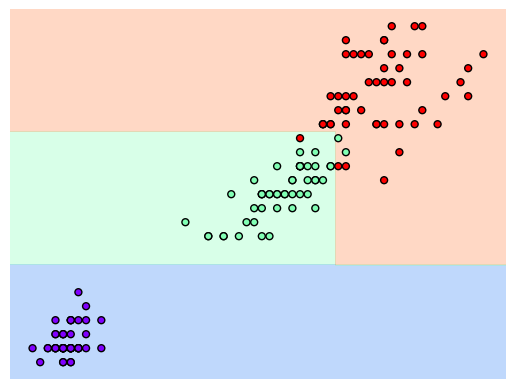

In [17]:
# iris 데이터 세트의 피처와 타겟 분리
# 전체 행의 3번째, 4번째 데이터를 선택하여 피처로 지정, 타겟 데이터를 타겟으로 지정
features, targets = iris.data[:, [2, 3]], iris.target

# 결정 트리의 무작위성을 제어하고 분류 모델 담기
# 리프 노드가 가져야 하는 최소 샘플수 지정(모델이 너무 복잡해 지는 것을 제어하여 과적합 방지)
dtc = DecisionTreeClassifier(random_state=124, min_samples_leaf=6)
# 데이터 학습
dtc.fit(features, targets)
# 시각화 함수를 통해 데이터 시각화
visualize_boundary(dtc, features, targets)